In [21]:
import pandas as pd 
import seaborn as sn
import numpy as np
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
%matplotlib inline

In [22]:
data = pd.read_csv("creditcard.csv")

# print(data.head())
# print(data.tail())
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [23]:
import matplotlib.pyplot as plt
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

CHECKING THE FRAUD AND NON-FRAUD CASES

In [24]:
classes = data["Class"].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

In [25]:
normal_cases = round((classes[0]/data["Class"].count()*100),2)
normal_cases

99.83

In [26]:
fraud_cases = round((classes[1]/data["Class"].count()*100),2)
fraud_cases

0.17

THE DATA IS IMBALANCED!

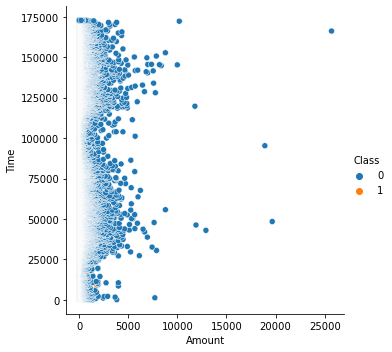

In [27]:
fraud_data = data.loc[data["Class"]==1]
non_fraud_data = data.loc[data["Class"]==0]

# print(fraud_data)
# print(fraud_data.count())
# print(len(fraud_data))
# print(len(non_fraud_data))

a = sn.relplot(x = "Amount", y = "Time", hue = "Class", data = data)
print(a)

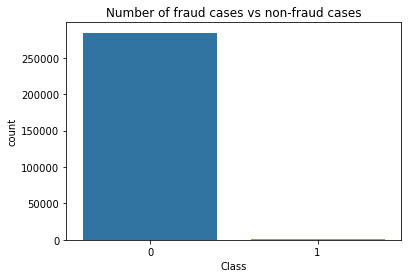

In [28]:
sn.countplot(x = 'Class', data = data)
plt.title('Number of fraud cases vs non-fraud cases')
plt.show()

In [29]:
X=data.iloc[:,:-1]
y=data["Class"]

print(X)
print(y)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35)
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
# predictions = model.predict(X_test)
# print(predictions)

DecisionTreeClassifier()

In [31]:
y_pred = model.predict(X_test)

confusion = metrics.confusion_matrix(y_test,y_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# ACCURACY
print("ACCURACY : ",accuracy_score(y_test,y_pred))

# CLASSIFICATION REPORT
print("CLASSIFICATION REPORT : \n",classification_report(y_test,y_pred))

# SENSITIVITY
print("SENSITIVITY : ",TP / float(TP+FN))

# SPECIFICITY
print("SPECIFICITY : ", TN / float(TN+FP))

# F1 SCORE
print("F1-SCORE : ", f1_score(y_test,y_pred))

[[99464    42]
 [   43   134]]
ACCURACY :  0.9991472969312721
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     99506
           1       0.76      0.76      0.76       177

    accuracy                           1.00     99683
   macro avg       0.88      0.88      0.88     99683
weighted avg       1.00      1.00      1.00     99683

SENSITIVITY :  0.7570621468926554
SPECIFICITY :  0.999577914899604
F1-SCORE :  0.7592067988668555


AUC :  0.8783200308961296


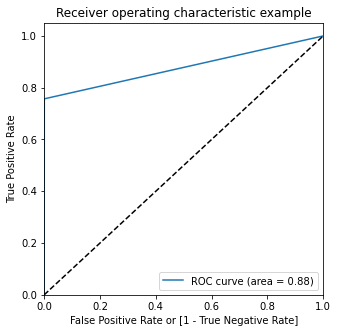

In [32]:
print("AUC : ", metrics.roc_auc_score(y_test, y_pred))

# PlOTTING THE ROC CURVE
draw_roc(y_test,y_pred)

# HANDLING THE DATA IMBALANCE IN THE DATASET


SINCE THE DATA IS HIGHLY IMBALANCED, I WILL TRY TO BALANCE THE CLASS DISTRIBUTION USING OVERSAMPLING DATA APPROACH.

# OVERSAMPLING

In [33]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [34]:
# CLASS DISTRIBUTION BEFORE SAMPLING 
print('BEFORE SAMPLING CLASS DISTRIBUTION : ',Counter(y_train))

BEFORE SAMPLING CLASS DISTRIBUTION:- Counter({0: 184809, 1: 315})


In [35]:
X_re, y_re = SMOTE().fit_sample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_re,y_re,test_size=0.35)
# NEW CLASS DISTRIBUTION 
print('NEW CLASS DISTRIBUTION : ',Counter(y_train))

NEW CLASS DISTRIBUTION:- Counter({0: 184862, 1: 184747})


In [36]:
model_re = DecisionTreeClassifier()
model_re.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
y_pred = model.predict(X_test)

confusion = metrics.confusion_matrix(y_test,y_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# ACCURACY
print("ACCURACY : ",accuracy_score(y_test,y_pred))

# CLASSIFICATION REPORT
print("CLASSIFICATION REPORT : \n",classification_report(y_test,y_pred))

# SENSITIVITY
print("SENSITIVITY : ",TP / float(TP+FN))

# SPECIFICITY
print("SPECIFICITY : ", TN / float(TN+FP))

# F1 SCORE
print("F1-SCORE : ", f1_score(y_test,y_pred))

[[99434    19]
 [17683 81885]]
ACCURACY :  0.9110546123273423
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92     99453
           1       1.00      0.82      0.90     99568

    accuracy                           0.91    199021
   macro avg       0.92      0.91      0.91    199021
weighted avg       0.92      0.91      0.91    199021

SENSITIVITY :  0.8224027800096416
SPECIFICITY :  0.9998089549837612
F1-SCORE :  0.9024532710280374


AUC :  0.9111058674967014


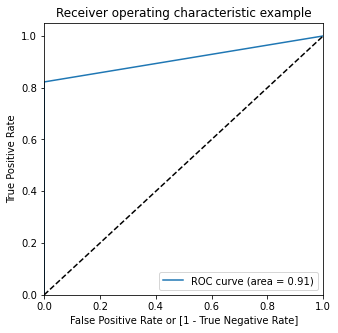

In [38]:
print("AUC : ", metrics.roc_auc_score(y_test, y_pred))

# PlOTTING THE ROC CURVE
draw_roc(y_test,y_pred)